In [54]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [55]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [56]:
# after extracting the NOAA in-situ measurements
# plot the locations of measurements

In [57]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
file1 = open(file_dir + 'filenames', 'r')
lines = file1.readlines()

In [58]:
nm_loc = len(lines) # number of locations
loc_dict = []
for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds = xr.open_dataset(file_dir + filename)
    code = ds.attrs['site_code']
    lon = ds.attrs['site_longitude']
    lat = ds.attrs['site_latitude']
    loc_dict.append((code,lon,lat))

In [59]:
#loc_dict

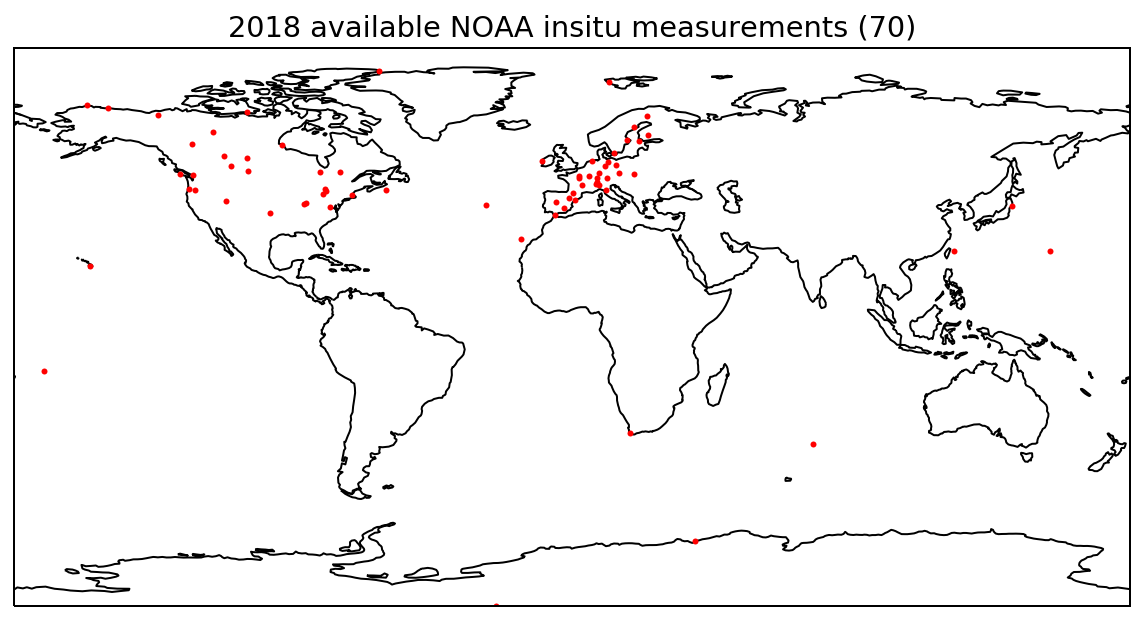

In [66]:
# plot after mapping
fig = plt.figure(figsize=[10, 7])
proj=ccrs.PlateCarree()

ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((-180.0, 180.0, -90., 90.0))

ny_lon, ny_lat = -75, 43
for name, lon, lat in loc_dict:
    plt.plot(lon, lat, marker='.', markersize=6.0, markeredgewidth=0,
                 markerfacecolor='red')
    #at_x, at_y = ax.projection.transform_point(lon, lat,
    #                                               src_crs=proj)
    #plt.annotate(' ', xy=(at_x, at_y), xytext=(-10, 20), textcoords='offset points',
    #        color='black', arrowprops=dict(arrowstyle='->', color='blue', linewidth=1.))
ax.set_title('2018 available NOAA insitu measurements (' + str(nm_loc) + ')');

fig.savefig(file_dir + 'noaa_locations_map.png', dpi=300)